<a href="https://colab.research.google.com/github/AaryanParpyani/CE085_ML_labs_sem6/blob/main/CE085_ML_LAB08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementation of stacking algo**

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_breast_cancer

from sklearn.metrics import accuracy_score

In [3]:
data = load_breast_cancer()
data.target_names, data.feature_names

(array(['malignant', 'benign'], dtype='<U9'),
 array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'))

In [4]:
from sklearn import preprocessing

X = preprocessing.MinMaxScaler().fit_transform(data.data)
y = data.target

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = 0.85
)

In [6]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train, y_train, train_size=0.75)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train, y_train, train_size=0.75)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_train, y_train, train_size=0.75)

## **i) Guassian naive bayes**

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model_2 = GaussianNB().fit(X_train_2, y_train_2)

y_pred_2 = model_2.predict(X_test_2)

print("Accuracy:",metrics.accuracy_score(y_test_2, y_pred_2))
print("Precision:",metrics.precision_score(y_test_2,y_pred_2))
print("Recall:",metrics.recall_score(y_test_2,y_pred_2))
print("F1 score:",metrics.f1_score(y_test_2,y_pred_2))

Accuracy: 0.9752066115702479
Precision: 0.9615384615384616
Recall: 1.0
F1 score: 0.9803921568627451


## **ii) Decision tree**

In [8]:
from sklearn import tree
from sklearn import metrics

model_1 = tree.DecisionTreeClassifier(max_depth=1)
model_1 = model_1.fit(X_train_1, y_train_1)

y_pred_1 = model_1.predict(X_test_1)
print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_1))
print("Precision:",metrics.precision_score(y_test_1,y_pred_1))
print("Recall:",metrics.recall_score(y_test_1,y_pred_1))
print("F1 score:",metrics.f1_score(y_test_1,y_pred_1))

Accuracy: 0.8760330578512396
Precision: 0.8571428571428571
Recall: 0.96
F1 score: 0.9056603773584904


## **iii) using multinomial naive bayes**

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

model_3 = MultinomialNB().fit(X_train_3, y_train_3)

y_pred_3 = model_3.predict(X_test_3)

print("Accuracy:",metrics.accuracy_score(y_test_3, y_pred_3))
print("Precision:",metrics.precision_score(y_test_3,y_pred_3))
print("Recall:",metrics.recall_score(y_test_3,y_pred_3))
print("F1 score:",metrics.f1_score(y_test_3,y_pred_3))

Accuracy: 0.8347107438016529
Precision: 0.7872340425531915
Recall: 1.0
F1 score: 0.880952380952381


## **iv) using Logistic Regression (final model)**

In [13]:
from sklearn.linear_model import LogisticRegression

X_train_final = []
y_train_final = []

y_train_final_1 = model_1.predict(X_train)
y_train_final_2 = model_2.predict(X_train)
y_train_final_3 = model_3.predict(X_train)

for i in range(len(y_train_final_1)):
  X_train_final.append([y_train_final_1[i], y_train_final_2[i], y_train_final_3[i]])
  y_train_final.append(y_train[i])

# Training the final model on the outputs of other models
model_final = LogisticRegression().fit(X_train_final, y_train_final)

In [15]:
from sklearn import metrics

X_test_final = []
y_test_final = []

y_test_final_1 = model_1.predict(X_test)
y_test_final_2 = model_2.predict(X_test)
y_test_final_3 = model_3.predict(X_test)

for i in range(len(y_test_final_1)):
  X_test_final.append([y_test_final_1[i], y_test_final_2[i], y_test_final_3[i]])
  y_test_final.append(y_test[i])

y_pred_final = model_final.predict(X_test_final)

print("Accuracy:",metrics.accuracy_score(y_test_final, y_pred_final))
print("Precision:",metrics.precision_score(y_test_final,y_pred_final))
print("Recall:",metrics.recall_score(y_test_final,y_pred_final))
print("F1 score:",metrics.f1_score(y_test_final,y_pred_final))

Accuracy: 0.9302325581395349
Precision: 0.9629629629629629
Recall: 0.9285714285714286
F1 score: 0.9454545454545454


## **Stacking by sklearn library**

In [16]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('gnb', GaussianNB()),
    ('dt', tree.DecisionTreeClassifier(max_depth=1)),
    ('mnb', MultinomialNB())
]

model_stacked = StackingClassifier(estimators=estimators).fit(X_train, y_train)

y_pred_stacked = model_stacked.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_stacked))
print("Precision:",metrics.precision_score(y_test,y_pred_stacked))
print("Recall:",metrics.recall_score(y_test,y_pred_stacked))
print("F1 score:",metrics.f1_score(y_test,y_pred_stacked))

Accuracy: 0.9186046511627907
Precision: 0.9622641509433962
Recall: 0.9107142857142857
F1 score: 0.9357798165137615


## **Bagging**

## **i) bagging classifier**

In [17]:
from sklearn.ensemble import BaggingClassifier

model_bagged = BaggingClassifier(max_features = 0.67).fit(X_train, y_train)

y_pred_bagged = model_bagged.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_bagged))
print("Precision:",metrics.precision_score(y_test,y_pred_bagged))
print("Recall:",metrics.recall_score(y_test,y_pred_bagged))
print("F1 score:",metrics.f1_score(y_test,y_pred_bagged))

Accuracy: 0.9534883720930233
Precision: 0.9642857142857143
Recall: 0.9642857142857143
F1 score: 0.9642857142857143


## **ii) random forest**

In [18]:
from sklearn.ensemble import RandomForestClassifier

model_random_forest = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

y_pred_random_forest = model_random_forest.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_random_forest))
print("Precision:",metrics.precision_score(y_test,y_pred_random_forest))
print("Recall:",metrics.recall_score(y_test,y_pred_random_forest))
print("F1 score:",metrics.f1_score(y_test,y_pred_random_forest))

Accuracy: 0.9534883720930233
Precision: 0.9642857142857143
Recall: 0.9642857142857143
F1 score: 0.9642857142857143


# **Adaboost classifier**

In [19]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=1).fit(X_train, y_train)

y_pred_adaboost = model_adaboost.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_adaboost))
print("Precision:",metrics.precision_score(y_test,y_pred_adaboost))
print("Recall:",metrics.recall_score(y_test,y_pred_adaboost))
print("F1 score:",metrics.f1_score(y_test,y_pred_adaboost))

Accuracy: 0.9883720930232558
Precision: 0.9824561403508771
Recall: 1.0
F1 score: 0.9911504424778761


# **EXERCISE**

## **i) try adaboost regression on concrete_data.csv**

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
from sklearn import preprocessing

data = pd.read_csv('Contrete.csv')

df = pd.DataFrame(data)

X = preprocessing.MinMaxScaler().fit_transform(df.iloc[:, :8].values)
y = df['slag'].values

X, y

(array([[1.        , 0.        , 0.        , ..., 0.69476744, 0.20572002,
         0.07417582],
        [1.        , 0.        , 0.        , ..., 0.73837209, 0.20572002,
         0.07417582],
        [0.52625571, 0.39649416, 0.        , ..., 0.38081395, 0.        ,
         0.73901099],
        ...,
        [0.10616438, 0.38786867, 0.54272864, ..., 0.26569767, 0.46663322,
         0.07417582],
        [0.1303653 , 0.51947691, 0.        , ..., 0.54825581, 0.48896136,
         0.07417582],
        [0.36278539, 0.27963272, 0.39130435, ..., 0.18459302, 0.42022077,
         0.07417582]]), array([  0. ,   0. , 142.5, ..., 139.4, 186.7, 100.5]))

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80)

loss = 100
count = 0

model_adaboost_regressor = AdaBoostRegressor(n_estimators=500, learning_rate=1, loss='square').fit(X_train, y_train)
y_pred = model_adaboost_regressor.predict(X_test)
loss = mean_squared_error(y_test, y_pred)
print(f"{count}/10 - Error: ", loss)
count = count+1

while loss>10 and count<=10:
  model_adaboost_regressor = AdaBoostRegressor(n_estimators=500, learning_rate=1, loss='square').fit(X_train, y_train)
  y_pred = model_adaboost_regressor.predict(X_test)
  loss = mean_squared_error(y_test, y_pred)
  print(f"{count}/10 - Error: ", loss)
  count = count+1

0/10 - Error:  23.52694678588397
1/10 - Error:  25.157203267588972
2/10 - Error:  25.797899562846826
3/10 - Error:  27.336444990765592
4/10 - Error:  24.560896788351986
5/10 - Error:  25.147920977174365
6/10 - Error:  26.871756744819535
7/10 - Error:  23.783266733865805
8/10 - Error:  26.526301549453468
9/10 - Error:  25.5030462225874
10/10 - Error:  26.994147851214382


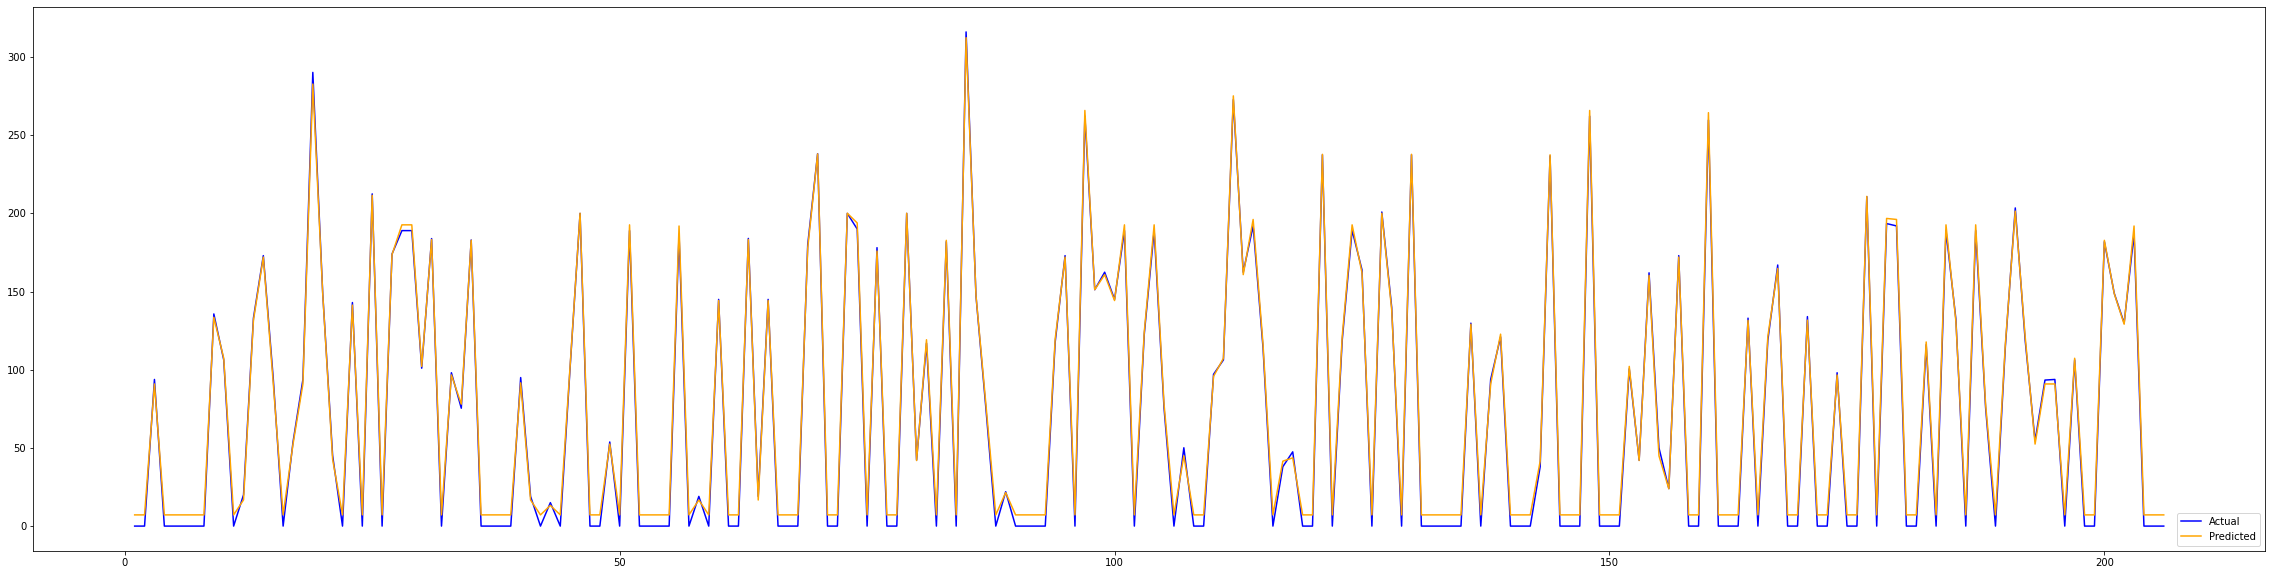

In [43]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(40,10))
plt.plot(np.arange(1,len(y_test)+1), y_test, label='Actual', color='blue')
plt.plot(np.arange(1,len(y_pred)+1), y_pred, label='Predicted', color='orange')

plt.legend(["Actual", "Predicted"], loc ="lower right")